In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('c:\\Users\\hp\\Downloads\\BikeSharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
# Checking for duplicated values
duplicate_values = df.duplicated().sum()
duplicate_values

0

In [4]:
# Encoding the categorical variables
df_encoded = pd.get_dummies(df, columns = ['season', 'holiday', 'workingday', 'weather'], drop_first=True)
df_encoded.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0,0,0


In [6]:
# Summary statistics
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

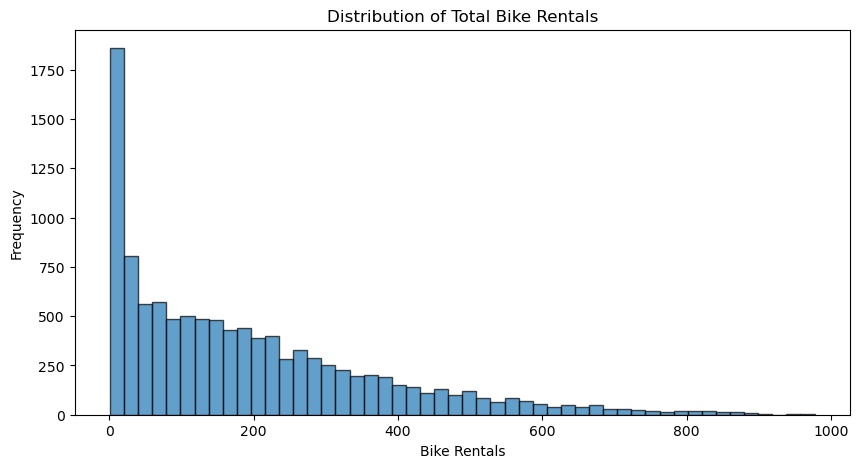

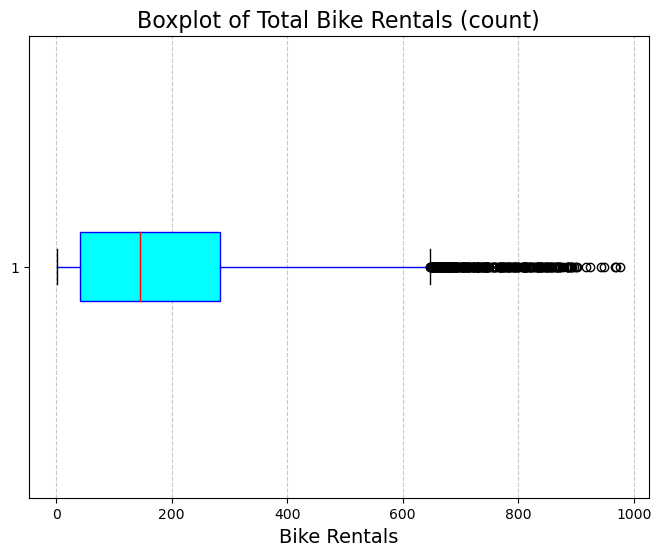

In [16]:
# Visualization
plt.figure(figsize=(10, 5))
plt.hist(df['count'], bins= 50, edgecolor='Black', alpha=0.7)
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['count'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='cyan', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'))
plt.title('Boxplot of Total Bike Rentals (count)', fontsize=16)
plt.xlabel('Bike Rentals', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
